# Sample of Dataset of Similar Side Effects

In [18]:
dataset = [
    ["Acute abdomen", "Syndrome abdominal acute", "Abdominal syndrome acute"],
    ["Abdominal cramps", "Abdominal cramp", "Cramp abdominal", "Abdominal crampy pains"],
    ["Distended abdomen", "Abdominal distension", "Swollen abdomen", "Swelling abdomen", "Swelling abd"],
    ["Abdominal mass", "Abdominal mass NOS", "Mass in abdomen", "Abdominal neoplasm NOS", "Abdominal neoplasm", "Abdominal tumor", "Abdominal tumour"],
    ["Abdominal pain", "Pain abdominal", "Abdominal pain NOS", "Abd. pain", "Abdo pain", "Pain abdo", "Gut pain"],
    ["Congenital abnormality NOS", "Birth defects", "Congenital anomaly", "Anomaly congenital", "Congenital anomaly NOS", "Foetal malformation", "Fetal malformation", "Developmental disturbance"],
    ["Spontaneous abortion", "Abortion spontaneous", "Abortion spontaneous NOS", "Abortions spontaneous", "Miscarriage", "Miscarriage of pregnancy"],
    ["Acidosis", "Acidosis NOS", "Lactic acidosis", "Acidosis lactic", "Renal tubular acidosis", "Acidosis renal tubular", "Renal acidosis tubular", "RTA", "Respiratory acidosis", "Acidosis respiratory"],
    ["AIDS", "Acquired immune deficiency syndrome", "Autoimmune deficiency syndrome", "Acquired immunodeficiency syndrome, unspecified", "Acquired immuno deficiency syndrome"],
    ["Adjustment disorder with depressed mood", "Adjustment disorder with disturbance of conduct", "Adjustment reaction with predominant disturbance of conduct", "Adjustment disorder with mixed disturbance of emotion and conduct"],
    ["Angioedema", "Angioedemas", "Edema angioneurotic", "Angioneurotic edema", "Angioneurotic oedema", "Oedema angioneurotic", "Quincke's edema", "Quincke's oedema", "Giant urticaria"],
    ["Anorexia", "Anorectic", "Anorexic", "Anorexia nervosa"],
    ["Anxiety", "Anxiety reaction", "Reaction anxiety", "Feeling anxious", "Anxiety disorder", "Separation anxiety disorder"],
    ["Anemia", "Anaemia", "Anemia NOS", "Unspecified anemia", "Anemia aplastic", "Aplastic anemia", "Aplastic anaemia", "Thalassemia major", "Hemolytic anemia", "Autoimmune hemolytic anemia"],
    ["Arthritis", "Arthritis NOS", "Gouty arthritis", "Arthritis gouty", "Gouty arthropathy", "Infectious arthritis"],
    ["Asthma", "Asthma NOS", "Asthma bronchial", "Asthma, unspecified", "Asthmatic"],
    ["Atopic dermatitis", "Dermatitis atopic", "Atopic eczema", "Eczema atopic", "Allergic eczema"],
    ["Bacterial infection", "Bacterial infection NOS", "Infection bacterial"],
    ["Back pain", "Backache", "Pain back", "Pain dorsal", "Backache, unspecified"],
    ["Blepharitis", "Blepharitis, unspecified", "Unspecified inflammation of eyelid"],
    ["Bronchospasm", "Bronchial spasm", "Spasm bronchial", "Bronchospasm NOS"],
    ["Candidiasis", "Candidiasis NOS", "Candida NOS", "Thrush"],
    ["Cardiac arrhythmia", "Cardiac dysrhythmia", "Arrhythmia cardiac", "Arrhythmia sinus", "Sinus arrhythmia"],
    ["Cataract", "Cataract congenital", "Unspecified cataract"],
    ["Cerebral palsy", "Palsy cerebral"],
    ["Cirrhosis", "Cirrhosis of liver without mention of alcohol"],
    ["Cognitive disorder", "Cognitive disorders", "Cognitive impairment"],
    ["Cold intolerance", "Sensitivity to cold"],
    ["Congestive heart failure", "Heart failure", "CHF"],
    ["Constipation", "Difficult stooling", "Irregular bowel movement"],
    ["Deafness", "Hearing loss", "Hearing impairment"],
    ["Depression", "Depression NOS", "Mental depression", "Depressive disorder", "Depressive reaction"],
    ["Diabetes mellitus", "Diabetes", "Type 1 diabetes mellitus", "Type 2 diabetes mellitus", "NIDDM", "IDDM"],
    ["Dizziness", "Vertigo", "Lightheadedness"],
    ["Dry skin", "Skin dryness", "Xerosis"],
    ["Edema", "Swelling", "Fluid retention"],
    ["Emphysema", "Chronic obstructive pulmonary disease"],
    ["Epilepsy", "Seizure disorder", "Convulsive disorder"],
    ["Fatigue", "Tiredness", "Exhaustion", "Lethargy"],
    ["Fever", "Elevated temperature", "Pyrexia"],
    ["Glaucoma", "Ocular hypertension"],
    ["Headache", "Cephalalgia", "Migraine"],
    ["Hepatitis", "Liver inflammation"],
    ["Hyperlipidemia", "High cholesterol"],
    ["Hypertension", "High blood pressure"],
    ["Hypoglycemia", "Low blood sugar"],
    ["Hypotension", "Low blood pressure"],
    ["Insomnia", "Difficulty sleeping", "Sleep disturbance"],
    ["Nausea", "Vomiting", "Sickness"],
    ["Obesity", "Overweight"],
    ["Osteoporosis", "Bone density loss"],
    ["Pneumonia", "Lung infection"],
    ["Rash", "Skin eruption", "Dermatitis"],
    ["Sepsis", "Blood infection"],
    ["Stroke", "Cerebrovascular accident", "CVA"],
    ["Tachycardia", "Fast heart rate"],
    ["Ulcer", "Sore", "Lesion"],
    ["Urinary incontinence", "Loss of bladder control"],
    ["Vomiting", "Emesis"],
    ["Weakness", "Loss of strength", "Debility"]
]


In [19]:
from utils.embeddings import genEmbs

all_effects = [effect for effects in dataset for effect in effects]
dense, sparse = genEmbs(all_effects)

In [20]:
def indexer(nrows: int) -> int:
    global dataset
    return sum([len(row) for row in dataset[:nrows]])

# Visualize Data

#

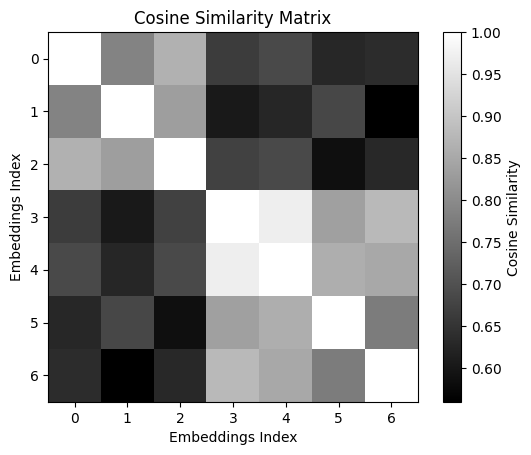

In [21]:
from utils.similarity import *
import numpy as np

nrows = 2
idx = indexer(nrows)
matrix = cosine_similarity_matrix(dense[:idx])
plot_similarity_matrix(matrix, cmap='gray')

# Clear GPU Memory

In [22]:
# clear GPU memory
import torch
torch.cuda.empty_cache()

# Custom Dataset

In [23]:
import torch
from torch.utils.data import Dataset
import numpy as np

class TripletDataset(Dataset):
    def __init__(self, dataset, dense):
        self.dataset = dataset
        self.dense = dense
        self.nTags = len(dataset)
        self.create_triplet()
        
    def create_triplet(self):
        self.anchors = []
        self.positives = []
        self.negatives = []
        for i in range(self.nTags):
            for j in range(len(self.dataset[i])):
                for k in range(j+1, len(self.dataset[i])):
                    anchor = (i, j)
                    positive = (i, k)
                    for l in range(self.nTags):
                        if l == i:
                            continue
                        self.anchors += [anchor] * len(self.dataset[l])
                        self.positives += [positive] * len(self.dataset[l])
                        self.negatives += [(l, m) for m in range(len(self.dataset[l]))]
    
    def _get_dense_index(self, i, j):
        return indexer(i) + j

    def __len__(self):
        return len(self.anchors)
    
    def __getitem__(self, idx):
        anchor = self.anchors[idx]
        positive = self.positives[idx]
        negative = self.negatives[idx]
        return self.dense[self._get_dense_index(*anchor)], self.dense[self._get_dense_index(*positive)], self.dense[self._get_dense_index(*negative)]
    

In [24]:
tripletDataset = TripletDataset(dataset, dense)
print(len(tripletDataset))

97282


In [25]:
# train test split
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

batch_size = 1024

tmp, test = train_test_split(tripletDataset, test_size=0.1, random_state=42)
train, val = train_test_split(tmp, test_size=0.1, random_state=42)

trainLoader = DataLoader(train, batch_size=batch_size, shuffle=True)
valLoader = DataLoader(val, batch_size=batch_size, shuffle=False)
testLoader = DataLoader(test, batch_size=batch_size, shuffle=False)

In [26]:
print(len(trainLoader), len(valLoader), len(testLoader))

77 9 10


# Post Net

In [27]:
# Model
import torch.nn as nn
import torch.nn.functional as F

class PostNet(nn.Module):
    def __init__(self):
        super(PostNet, self).__init__()
        self.fc1 = nn.Linear(1024, 1024)
        self.bn = nn.BatchNorm1d(1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.output = nn.Linear(1024, 1024)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Configurations

In [28]:
MODEL = PostNet()
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
LEARNING_RATE = 1e-5
OPTIMIZER = torch.optim.Adam(MODEL.parameters(), lr=LEARNING_RATE)
CRITERION = nn.TripletMarginLoss(margin=1.0, p=2)
EPOCH = 1000
EVALUATION_INTERVAL = 1
SAVE_INTERVAL = 10

MODEL.to(DEVICE)


PostNet(
  (fc1): Linear(in_features=1024, out_features=1024, bias=True)
  (bn): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (output): Linear(in_features=1024, out_features=1024, bias=True)
  (relu): ReLU()
)

In [29]:
print(f'Using device: {DEVICE}')

Using device: cuda


In [30]:
# show model
from torchsummary import summary
summary(MODEL, (1024,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1024]       1,049,600
       BatchNorm1d-2                 [-1, 1024]           2,048
              ReLU-3                 [-1, 1024]               0
            Linear-4                 [-1, 1024]       1,049,600
              ReLU-5                 [-1, 1024]               0
            Linear-6                 [-1, 1024]       1,049,600
Total params: 3,150,848
Trainable params: 3,150,848
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 12.02
Estimated Total Size (MB): 12.07
----------------------------------------------------------------


In [31]:
for dat in trainLoader:
    anchor, positive, negative = dat
    anchor = anchor.to(DEVICE)
    positive = positive.to(DEVICE)
    negative = negative.to(DEVICE)
    print(anchor.size())
    print(positive.size())
    print(negative.size())
    print(anchor)
    # forward
    out1 = MODEL(anchor)
    out2 = MODEL(positive)
    out3 = MODEL(negative)
    # calc loss
    loss = CRITERION(out1, out2, out3)
    print(loss)
    break

torch.Size([1024, 1024])
torch.Size([1024, 1024])
torch.Size([1024, 1024])
tensor([[-0.0071,  0.0415, -0.0174,  ...,  0.0276, -0.0641, -0.0148],
        [-0.0414,  0.0012, -0.0078,  ..., -0.0169, -0.0350, -0.0267],
        [-0.0366,  0.0265, -0.0320,  ...,  0.0031, -0.0031,  0.0012],
        ...,
        [-0.0392, -0.0073, -0.0125,  ...,  0.0081, -0.0519,  0.0275],
        [-0.0531,  0.0222, -0.0391,  ...,  0.0298, -0.0132, -0.0089],
        [-0.0204,  0.0356, -0.0528,  ..., -0.0104, -0.0229, -0.0127]],
       device='cuda:0')
tensor(0.3670, device='cuda:0', grad_fn=<MeanBackward0>)


# Training Loop

In [32]:
# Load model

# ckpt_path = './model/model_best.pth'
# MODEL.load_state_dict(torch.load(ckpt_path))

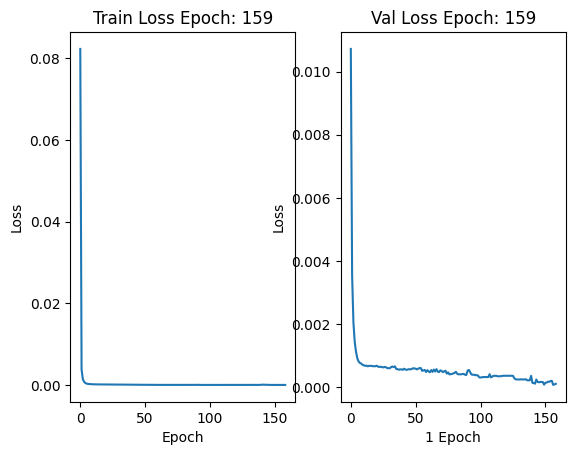

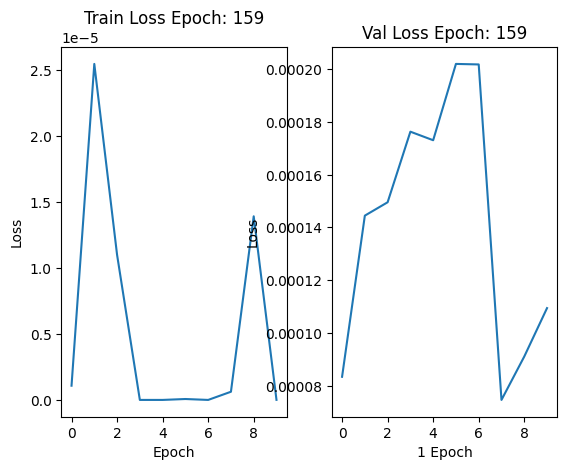

9it [00:00, 34.09it/s]000 [08:27<49:38,  3.54s/it]


In [ ]:
# Training
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output


train_losses = []
val_losses = []

for epoch in tqdm(range(1, EPOCH+1)):

    MODEL.train()
    epoch_loss = []
    for i, (anchor, positive, negative) in enumerate(trainLoader):
        anchor, positive, negative = anchor.to(DEVICE), positive.to(DEVICE), negative.to(DEVICE)
        OPTIMIZER.zero_grad()
        anchor = MODEL(anchor)
        positive = MODEL(positive)
        negative = MODEL(negative)
        loss = CRITERION(anchor, positive, negative)
        loss.backward()
        OPTIMIZER.step()
        # print(f'Epoch: {epoch}, Batch: {i}, Loss: {loss.item()}')
        batch_loss = loss.item()
        epoch_loss.append(batch_loss)
    train_losses.append(np.mean(epoch_loss))

    if epoch % EVALUATION_INTERVAL == 0:
        MODEL.eval()
        epoch_loss = []
        with torch.no_grad():
            for i, (anchor, positive, negative) in tqdm(enumerate(valLoader)):
                anchor, positive, negative = anchor.to(DEVICE), positive.to(DEVICE), negative.to(DEVICE)
                anchor = MODEL(anchor)
                positive = MODEL(positive)
                negative = MODEL(negative)
                loss = CRITERION(anchor, positive, negative)
                # print(f'Epoch: {epoch}, Batch: {i}, Loss: {loss.item()}')
                batch_loss = loss.item()
                epoch_loss.append(batch_loss)
        if len(val_losses) != 0 and np.mean(epoch_loss) < min(val_losses):
            torch.save(MODEL.state_dict(), f'./model/model_best.pth')
        val_losses.append(np.mean(epoch_loss))

    if epoch % SAVE_INTERVAL == 0:
        torch.save(MODEL.state_dict(), f'./model/model_{epoch}.pth')

    # clear display
    clear_output(wait=True)

    # plot
    plt.subplot(1, 2, 1)
    plt.plot(train_losses)
    plt.title(f'Train Loss Epoch: {epoch}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.subplot(1, 2, 2)
    plt.plot(val_losses)
    plt.title(f'Val Loss Epoch: {epoch}')
    plt.xlabel(f'{EVALUATION_INTERVAL} Epoch')
    plt.ylabel('Loss')
    plt.show()

    # plot moving loss
    scope = 10
    scoped_train_losses = train_losses[max(0, epoch-scope):epoch]
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(scoped_train_losses)), scoped_train_losses)
    plt.title(f'Train Loss Epoch: {epoch}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    scoped_val_losses = val_losses[max(0, epoch-scope):epoch]
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(len(scoped_val_losses)), scoped_val_losses)
    plt.title(f'Val Loss Epoch: {epoch}')
    plt.xlabel(f'{EVALUATION_INTERVAL} Epoch')
    plt.ylabel('Loss')
    plt.show()


In [ ]:
# test
MODEL.load_state_dict(torch.load(f'./model/model_best.pth'))
MODEL.eval()
with torch.no_grad():
    epoch_loss = []
    for i, (anchor, positive, negative) in tqdm(enumerate(testLoader)):
        anchor, positive, negative = anchor.to(DEVICE), positive.to(DEVICE), negative.to(DEVICE)
        anchor = MODEL(anchor)
        positive = MODEL(positive)
        negative = MODEL(negative)
        loss = CRITERION(anchor, positive, negative)
        # print(f'Epoch: {epoch}, Batch: {i}, Loss: {loss.item()}')
        batch_loss = loss.item()
        epoch_loss.append(batch_loss)
    test_loss = np.mean(epoch_loss)

print(f'Test Loss: {test_loss}')

10it [00:00, 52.15it/s]


Test Loss: 0.0002881115768104792
